In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import tree
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler


In [31]:
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [32]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [33]:
df.shape

(39644, 61)

In [34]:
df.dtypes[0:60]

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [35]:
df.dtypes[60:61]

 shares    int64
dtype: object

In [36]:
#percent of missing values 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent_missing': percent_missing})
missing_value_df[0:60]

,Percent_missing
url,0.0
timedelta,0.0
n_tokens_title,0.0
n_tokens_content,0.0
n_unique_tokens,0.0
n_non_stop_words,0.0
n_non_stop_unique_tokens,0.0
num_hrefs,0.0
num_self_hrefs,0.0
num_imgs,0.0


In [37]:
missing_value_df[60:61]

,Percent_missing
shares,0.0


In [38]:
#Outliers 
def boxPlot (df, col):
    df.boxplot(column = [col])
    plt.grid(False)
    plt.show()

In [39]:
#df.drop(['url'], axis = 1, inplace = True)

In [40]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b13b80890>,
      dtype=object)

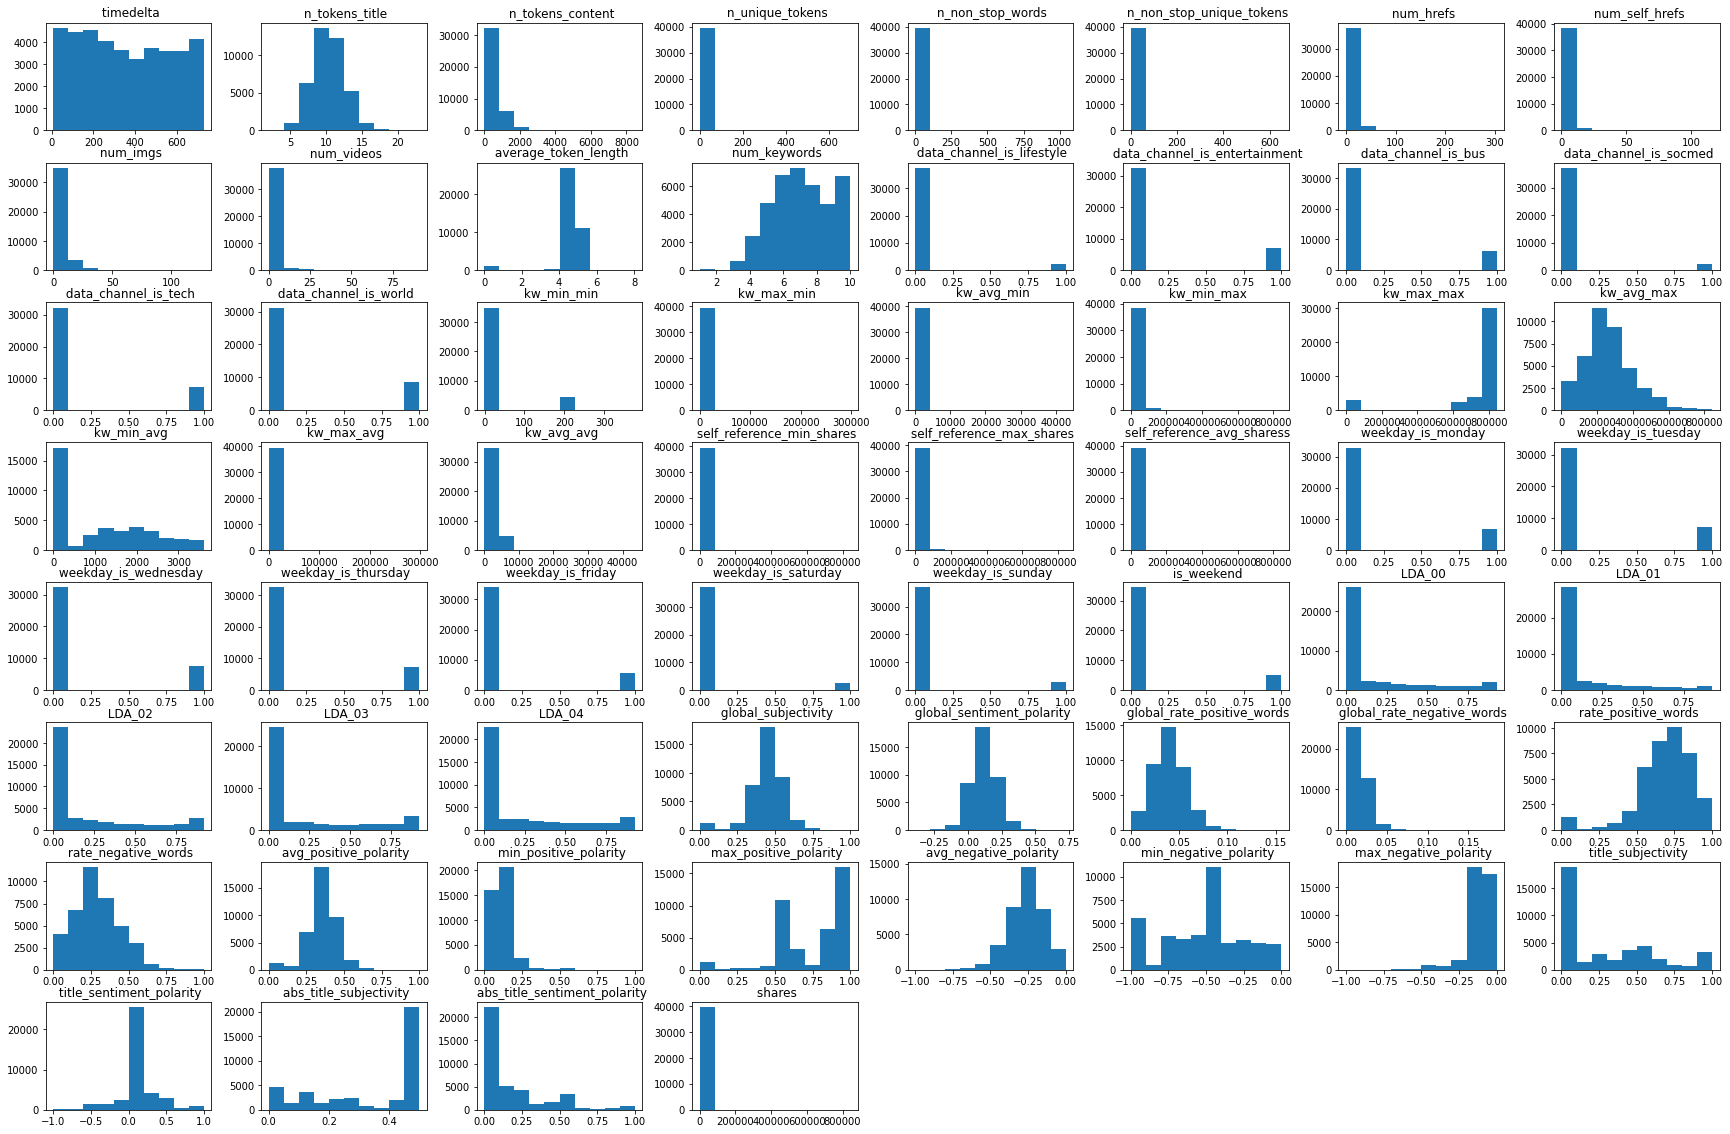

In [41]:
df.hist(figsize=(30,20), grid=False)

<h2>Feature Selection</h2>

In [42]:
org_df = df.copy()

In [43]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

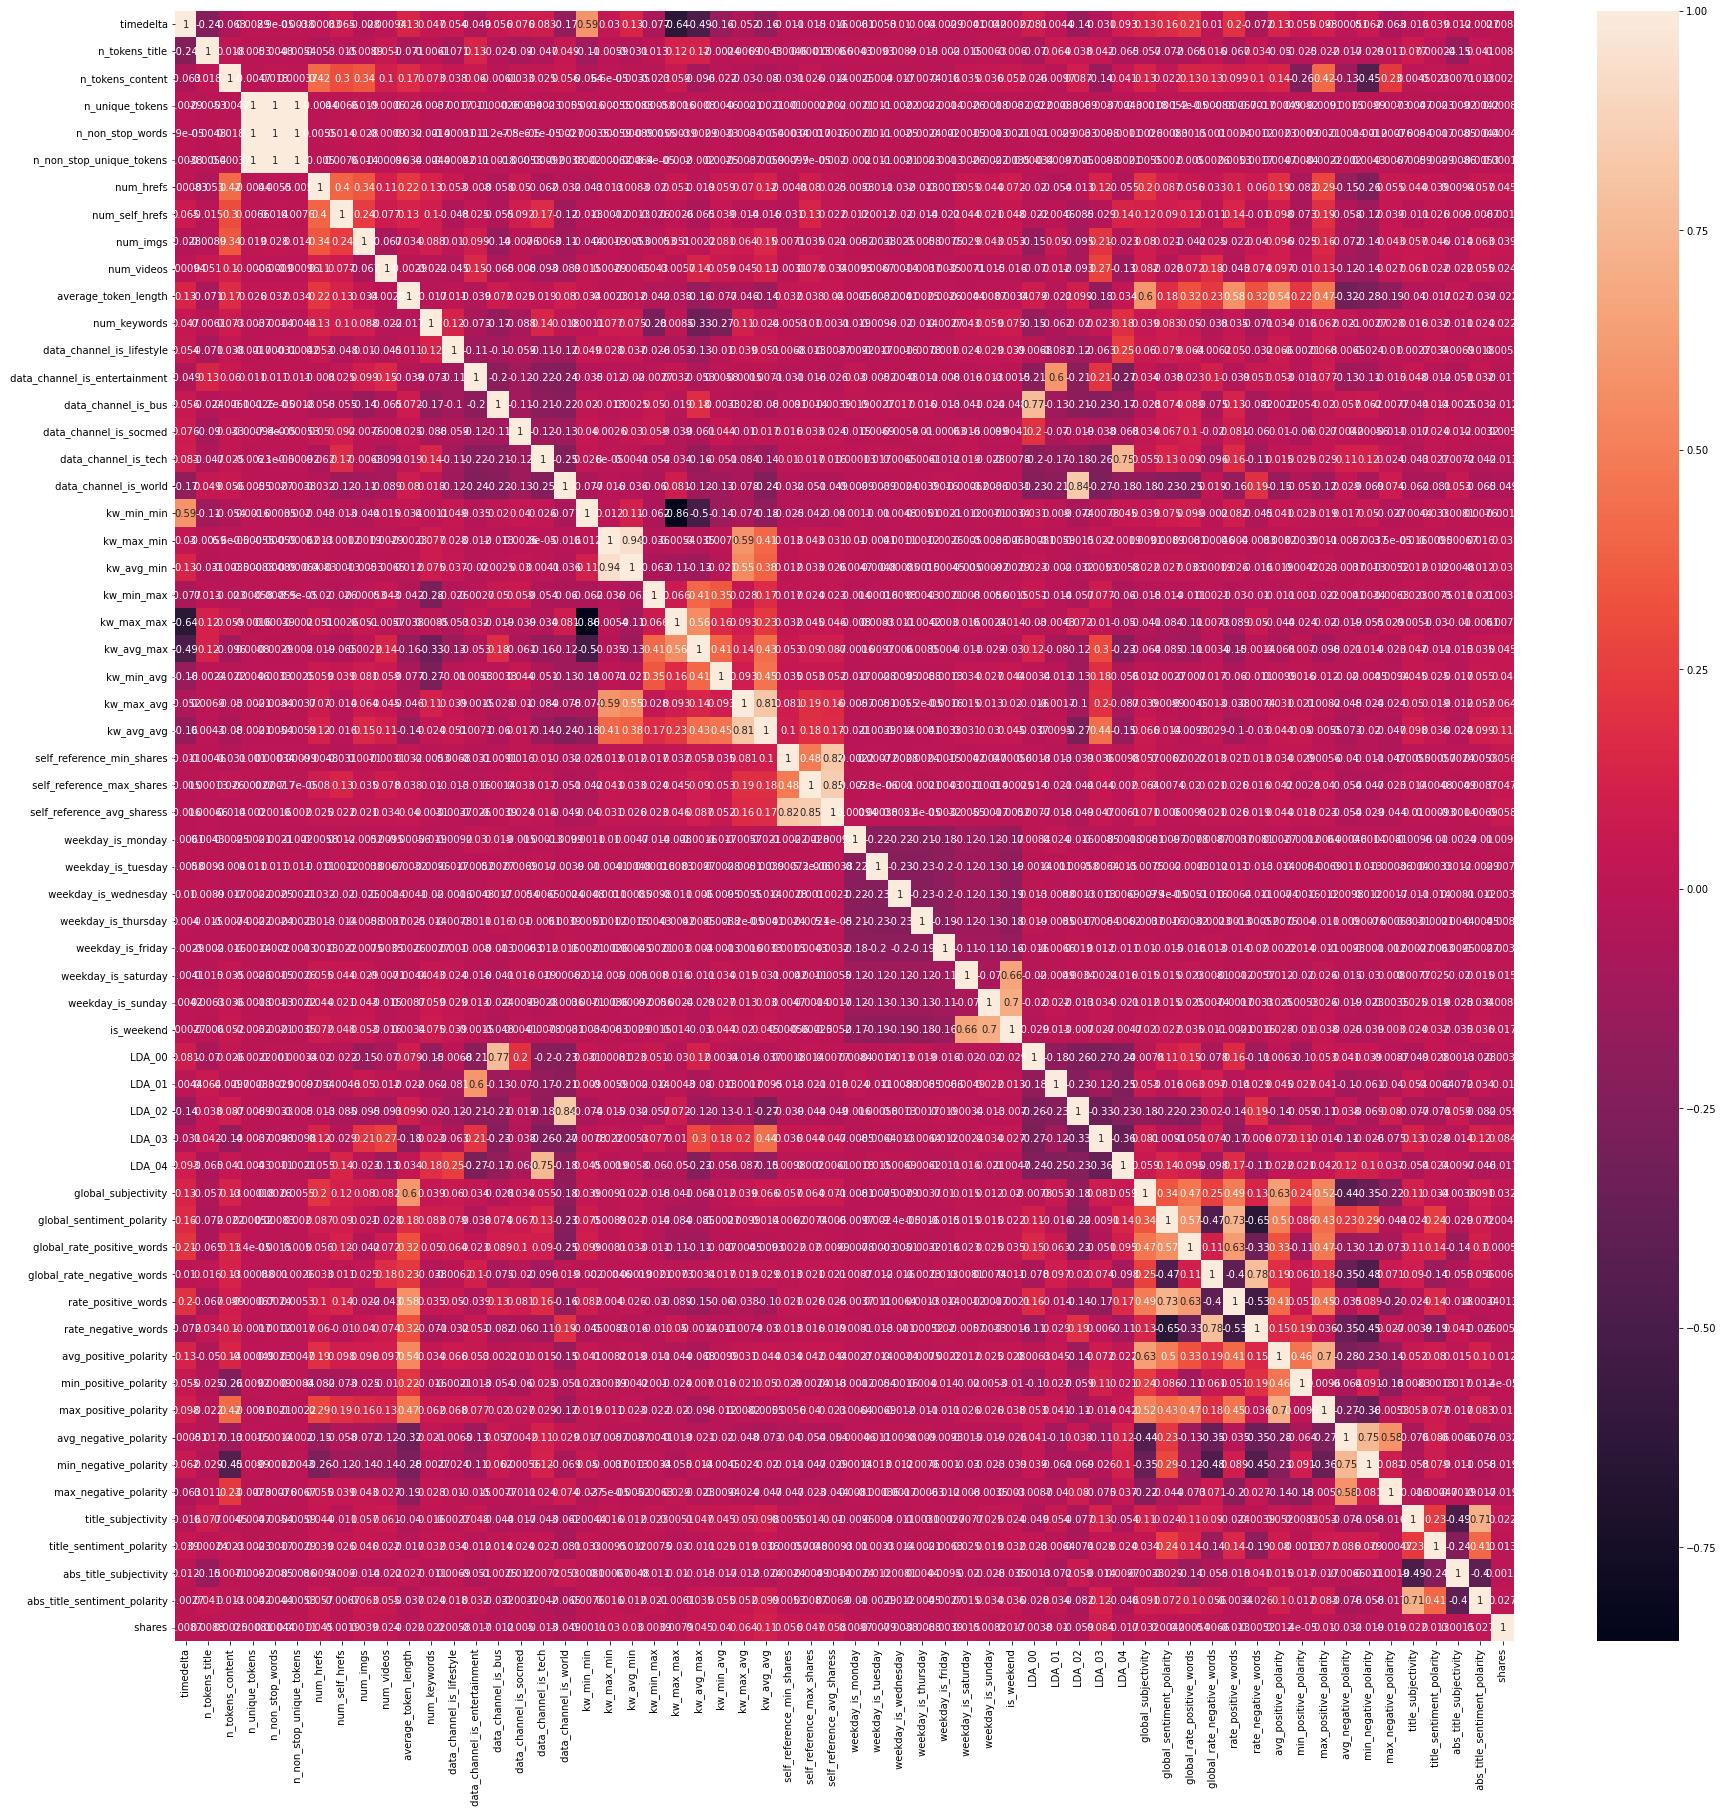

In [44]:
#Feature Selection 
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(corrmat,annot=True)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
correlated_features = correlation(X_train, 0.5)
len(set(correlated_features))

23

In [47]:
c=list(correlated_features)
for i in c:
    del(df[i])

In [48]:
df.shape

(39644, 38)

In [49]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_max_min',
       ' kw_min_max', ' kw_min_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' LDA_03', ' global_sentiment_polarity', ' global_rate_negative_words',
       ' min_positive_polarity', ' avg_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' shares'],
      dtype='object')

<h2>Learning Curve</h2>

In [50]:
def LearningCurve(Reg, x, y):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator = Reg,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error")
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)

    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std (axis=1)

    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Error")
    plt.legend(loc="best")

    plt.show()

<h2>Linear Regression</h2>

In [51]:
org_df = org_df.drop(['url'], axis = 1)
df = df.drop(['url'], axis = 1)

In [52]:
X = org_df.iloc[:,:-1]
Y = org_df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [53]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [66]:
x_scaler = MinMaxScaler()

x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

X_train1 = x_scaler.fit_transform(X_train)
X_test1 = x_scaler.transform(X_test)

**Before Feature Selection**

In [71]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
Y_pred_reg = linear_regressor.predict(X_test)

In [73]:
R2 =r2_score(Y_test, Y_pred_reg)
MAE =  mean_absolute_error(Y_test, Y_pred_reg)
MSE = mean_squared_error(Y_test, Y_pred_reg)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred_reg))

In [74]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  0.017089221523782783
Mean Absolute Error:  3093.073488366201
Mean Squared Error:  172352167.3137107
Root Mean Squared Error:  13128.296436084565


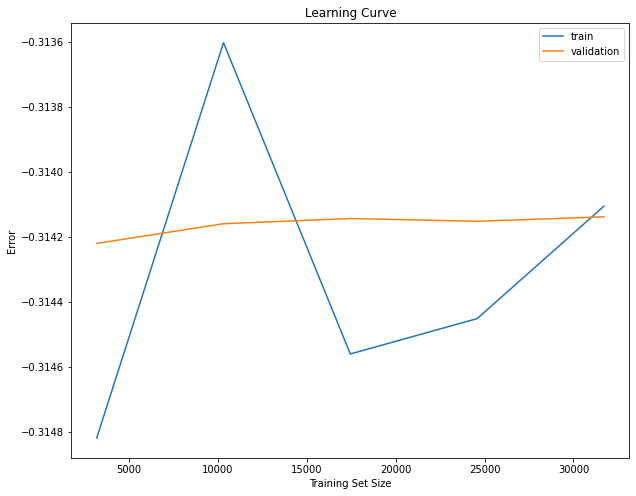

In [70]:
LearningCurve(linear_regressor,X, Y)

**After Feature Selection**

In [58]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)

In [59]:
R2 =r2_score(y_test, y_pred)
MAE =  mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [60]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  0.013657306386347212
Mean Absolute Error:  3117.640505612762
Mean Squared Error:  172953949.31155464
Root Mean Squared Error:  13151.195736949345


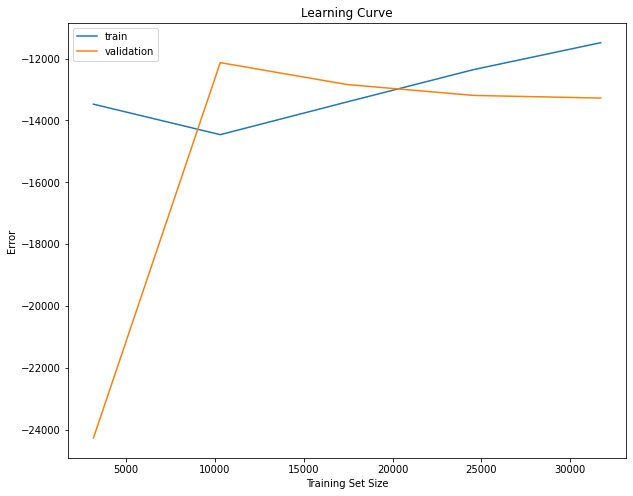

In [75]:
LearningCurve(linear_regressor,x, y)

### Regression With Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=5)

tree_reg1.fit(x_train, y_train)
tree_reg2.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [81]:
tree_y_pred = tree_reg1.predict(x_test)
tree_Y_pred = tree_reg2.predict(X_test)

**Before Feature Selection**

In [84]:
R2 =r2_score(Y_test, tree_Y_pred)
MAE =  mean_absolute_error(Y_test, tree_Y_pred)
MSE = mean_squared_error(Y_test, tree_Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, tree_Y_pred))

In [85]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  -0.07248389078535311
Mean Absolute Error:  3115.030348060374
Mean Squared Error:  188058699.76566663
Root Mean Squared Error:  13713.449593944866


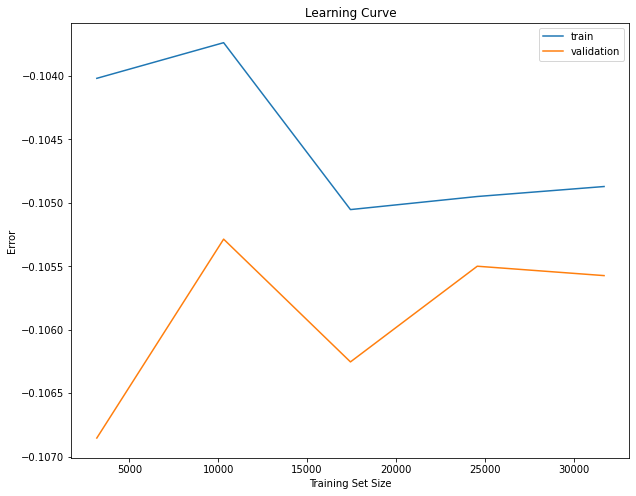

In [87]:
LearningCurve(tree_reg2,X, Y)

**After Feature Selection**

In [82]:
R2 =r2_score(y_test, tree_y_pred)
MAE =  mean_absolute_error(y_test, tree_y_pred)
MSE = mean_squared_error(y_test, tree_y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, tree_y_pred))

In [83]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  -0.10885826527630149
Mean Absolute Error:  3222.9368164823704
Mean Squared Error:  194436900.52964088
Root Mean Squared Error:  13944.06327186021


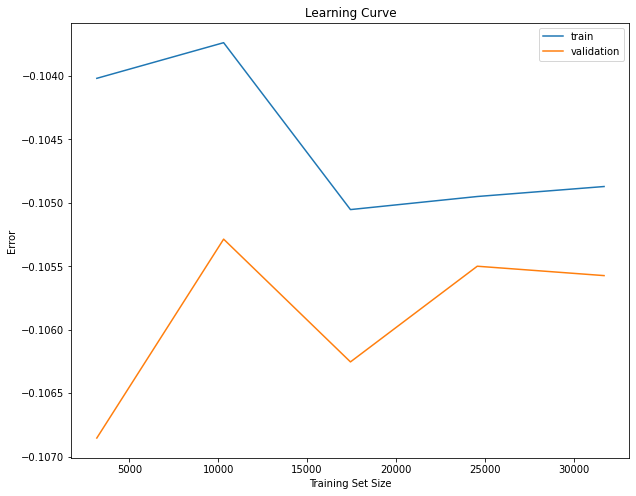

In [88]:
LearningCurve(tree_reg1,X, Y)

## <h2>KNN

In [90]:
knn1 = KNeighborsRegressor()
knn2 = KNeighborsRegressor()

knn1.fit(X_train, Y_train)
knn2.fit(x_train, y_train)

KNeighborsRegressor()

In [92]:
knn_y_pred = knn2.predict(x_test)
knn_Y_pred = knn1.predict(X_test)

**Before Feature Selection**

In [93]:
R2 =r2_score(Y_test, knn_Y_pred)
MAE =  mean_absolute_error(Y_test, knn_Y_pred)
MSE = mean_squared_error(Y_test, knn_Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, knn_Y_pred))

In [94]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  -0.0736327031123758
Mean Absolute Error:  3372.9361962416447
Mean Squared Error:  188260142.56061292
Root Mean Squared Error:  13720.79234448991


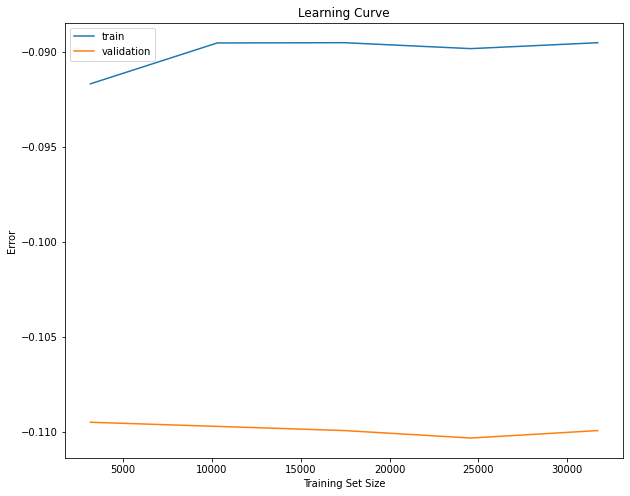

In [95]:
LearningCurve(knn1,X, Y)

**After Feature Selection**

In [96]:
R2 =r2_score(y_test, knn_y_pred)
MAE =  mean_absolute_error(y_test, knn_y_pred)
MSE = mean_squared_error(y_test, knn_y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, knn_y_pred))

In [97]:
print('R2 Score: ', R2)
print('Mean Absolute Error: ', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

R2 Score:  -0.09559927336494267
Mean Absolute Error:  3388.883200908059
Mean Squared Error:  192111952.99385294
Root Mean Squared Error:  13860.445627534958


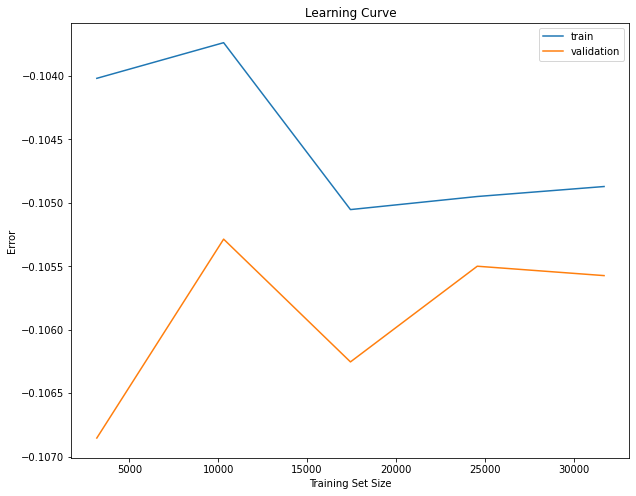

In [98]:
LearningCurve(tree_reg1,X, Y)